In [1]:
from lightgbm import LGBMRegressor
import optuna
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import cross_val_score
from prunedcv import PrunedCV
import seaborn as sns
import numpy as np

/Users/piotrgabrys/.pyenv/versions/miniconda3-4.3.30/lib/python3.6/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.1) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [2]:
data = fetch_california_housing()
x = data['data']
y = data['target']

In [3]:
model = LGBMRegressor()

In [4]:
def obejctive_standard(trial):
    
    n_estimators = trial.suggest_int('n_estimators', 5, 100)
    num_leaves = trial.suggest_int('num_leaves', 2, 100)
    colsample_bytree = trial.suggest_uniform('colsample_bytree', 0.5, 1.0)
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-0)
    max_depth = trial.suggest_int('max_depth', 2, 500)


    params = {        
        'n_estimators': n_estimators,
        'num_leaves': num_leaves,
        'colsample_bytree': colsample_bytree,
        'learning_rate': learning_rate,
        'max_depth': max_depth
    }
    
    model.set_params(**params)

    return - np.mean(cross_val_score(model, x, y, cv=12, scoring='neg_mean_squared_error'))

study_standard = optuna.create_study()

study_standard.optimize(obejctive_standard, timeout=120)

[I 2019-03-11 08:27:18,377] Finished a trial resulted in value: 0.4991890402874952. Current best value is 0.4991890402874952 with parameters: {'n_estimators': 41, 'num_leaves': 8, 'colsample_bytree': 0.5087248517567818, 'learning_rate': 0.09311281345586668, 'max_depth': 53}.
[I 2019-03-11 08:27:18,693] Finished a trial resulted in value: 0.8173053674796743. Current best value is 0.4991890402874952 with parameters: {'n_estimators': 41, 'num_leaves': 8, 'colsample_bytree': 0.5087248517567818, 'learning_rate': 0.09311281345586668, 'max_depth': 53}.
[I 2019-03-11 08:27:21,621] Finished a trial resulted in value: 0.4689128437837984. Current best value is 0.4689128437837984 with parameters: {'n_estimators': 99, 'num_leaves': 90, 'colsample_bytree': 0.5037384850393685, 'learning_rate': 0.5367716309941282, 'max_depth': 118}.
[I 2019-03-11 08:27:23,295] Finished a trial resulted in value: 0.47244621238885065. Current best value is 0.4689128437837984 with parameters: {'n_estimators': 99, 'num_le

[I 2019-03-11 08:27:46,079] Finished a trial resulted in value: 0.3400678893324869. Current best value is 0.33895707604359826 with parameters: {'n_estimators': 82, 'num_leaves': 29, 'colsample_bytree': 0.8944563466175337, 'learning_rate': 0.16218105311187478, 'max_depth': 309}.
[I 2019-03-11 08:27:48,174] Finished a trial resulted in value: 0.48698865386995793. Current best value is 0.33895707604359826 with parameters: {'n_estimators': 82, 'num_leaves': 29, 'colsample_bytree': 0.8944563466175337, 'learning_rate': 0.16218105311187478, 'max_depth': 309}.
[I 2019-03-11 08:27:51,282] Finished a trial resulted in value: 0.8111842468867647. Current best value is 0.33895707604359826 with parameters: {'n_estimators': 82, 'num_leaves': 29, 'colsample_bytree': 0.8944563466175337, 'learning_rate': 0.16218105311187478, 'max_depth': 309}.
[I 2019-03-11 08:27:53,688] Finished a trial resulted in value: 0.35002736644630655. Current best value is 0.33895707604359826 with parameters: {'n_estimators': 8

[I 2019-03-11 08:28:28,831] Finished a trial resulted in value: 0.3822523863730984. Current best value is 0.33895707604359826 with parameters: {'n_estimators': 82, 'num_leaves': 29, 'colsample_bytree': 0.8944563466175337, 'learning_rate': 0.16218105311187478, 'max_depth': 309}.
[I 2019-03-11 08:28:29,523] Finished a trial resulted in value: 1.3746114899268302. Current best value is 0.33895707604359826 with parameters: {'n_estimators': 82, 'num_leaves': 29, 'colsample_bytree': 0.8944563466175337, 'learning_rate': 0.16218105311187478, 'max_depth': 309}.
[I 2019-03-11 08:28:30,298] Finished a trial resulted in value: 1.0960573207848634. Current best value is 0.33895707604359826 with parameters: {'n_estimators': 82, 'num_leaves': 29, 'colsample_bytree': 0.8944563466175337, 'learning_rate': 0.16218105311187478, 'max_depth': 309}.
[I 2019-03-11 08:28:30,590] Finished a trial resulted in value: 1.149774374669996. Current best value is 0.33895707604359826 with parameters: {'n_estimators': 82, 

[I 2019-03-11 08:29:08,110] Finished a trial resulted in value: 0.36674136352546766. Current best value is 0.33895707604359826 with parameters: {'n_estimators': 82, 'num_leaves': 29, 'colsample_bytree': 0.8944563466175337, 'learning_rate': 0.16218105311187478, 'max_depth': 309}.
[I 2019-03-11 08:29:08,780] Finished a trial resulted in value: 0.4027322312446581. Current best value is 0.33895707604359826 with parameters: {'n_estimators': 82, 'num_leaves': 29, 'colsample_bytree': 0.8944563466175337, 'learning_rate': 0.16218105311187478, 'max_depth': 309}.
[I 2019-03-11 08:29:10,396] Finished a trial resulted in value: 0.9051937224019238. Current best value is 0.33895707604359826 with parameters: {'n_estimators': 82, 'num_leaves': 29, 'colsample_bytree': 0.8944563466175337, 'learning_rate': 0.16218105311187478, 'max_depth': 309}.
[I 2019-03-11 08:29:10,930] Finished a trial resulted in value: 1.2060556015047859. Current best value is 0.33895707604359826 with parameters: {'n_estimators': 82

In [5]:
prun = PrunedCV(12, 0.1, probabilistic_prun=True)

def objective_pruned(trial):

    n_estimators = trial.suggest_int('n_estimators', 5, 100)
    num_leaves = trial.suggest_int('num_leaves', 2, 100)
    colsample_bytree = trial.suggest_uniform('colsample_bytree', 0.5, 1.0)
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-0)
    max_depth = trial.suggest_int('max_depth', 2, 500)


    params = {        
        'n_estimators': n_estimators,
        'num_leaves': num_leaves,
        'colsample_bytree': colsample_bytree,
        'learning_rate': learning_rate,
        'max_depth': max_depth
    }
    
    model.set_params(**params)

    return prun.cross_val_score(model, x, y)

study_pruned = optuna.create_study()

study_pruned.optimize(objective_pruned, timeout=120)

[I 2019-03-11 08:29:19,607] Finished a trial resulted in value: 1.370454447574005. Current best value is 1.370454447574005 with parameters: {'n_estimators': 38, 'num_leaves': 63, 'colsample_bytree': 0.7090227997589819, 'learning_rate': 0.0002503267449605633, 'max_depth': 98}.
[I 2019-03-11 08:29:21,189] Finished a trial resulted in value: 0.7142694230248722. Current best value is 0.7142694230248722 with parameters: {'n_estimators': 76, 'num_leaves': 48, 'colsample_bytree': 0.923154254825297, 'learning_rate': 0.00946246241945376, 'max_depth': 411}.
[I 2019-03-11 08:29:21,413] Finished a trial resulted in value: 1.3203663204520573. Current best value is 0.7142694230248722 with parameters: {'n_estimators': 76, 'num_leaves': 48, 'colsample_bytree': 0.923154254825297, 'learning_rate': 0.00946246241945376, 'max_depth': 411}.
[I 2019-03-11 08:29:21,701] Finished a trial resulted in value: 0.41676818242042746. Current best value is 0.41676818242042746 with parameters: {'n_estimators': 38, 'num

[I 2019-03-11 08:29:35,639] Finished a trial resulted in value: 0.3441245866654745. Current best value is 0.34168683235833425 with parameters: {'n_estimators': 92, 'num_leaves': 73, 'colsample_bytree': 0.8743834157153579, 'learning_rate': 0.10310833426440745, 'max_depth': 261}.
[I 2019-03-11 08:29:35,970] Finished a trial resulted in value: 0.5096344239911031. Current best value is 0.34168683235833425 with parameters: {'n_estimators': 92, 'num_leaves': 73, 'colsample_bytree': 0.8743834157153579, 'learning_rate': 0.10310833426440745, 'max_depth': 261}.
[I 2019-03-11 08:29:36,397] Finished a trial resulted in value: 0.3992773084325727. Current best value is 0.34168683235833425 with parameters: {'n_estimators': 92, 'num_leaves': 73, 'colsample_bytree': 0.8743834157153579, 'learning_rate': 0.10310833426440745, 'max_depth': 261}.
[I 2019-03-11 08:29:36,872] Finished a trial resulted in value: 0.6477657400973085. Current best value is 0.34168683235833425 with parameters: {'n_estimators': 92,

[I 2019-03-11 08:29:42,256] Finished a trial resulted in value: 0.4264595177367139. Current best value is 0.33658532945692415 with parameters: {'n_estimators': 71, 'num_leaves': 14, 'colsample_bytree': 0.901363112863797, 'learning_rate': 0.17139165297863015, 'max_depth': 384}.
[I 2019-03-11 08:29:42,736] Finished a trial resulted in value: 0.4265669152628623. Current best value is 0.33658532945692415 with parameters: {'n_estimators': 71, 'num_leaves': 14, 'colsample_bytree': 0.901363112863797, 'learning_rate': 0.17139165297863015, 'max_depth': 384}.
[I 2019-03-11 08:29:42,969] Finished a trial resulted in value: 0.4168055670867043. Current best value is 0.33658532945692415 with parameters: {'n_estimators': 71, 'num_leaves': 14, 'colsample_bytree': 0.901363112863797, 'learning_rate': 0.17139165297863015, 'max_depth': 384}.
[I 2019-03-11 08:29:43,133] Finished a trial resulted in value: 0.3870215161034703. Current best value is 0.33658532945692415 with parameters: {'n_estimators': 71, 'n

[I 2019-03-11 08:29:50,044] Finished a trial resulted in value: 0.4905102590664455. Current best value is 0.33658532945692415 with parameters: {'n_estimators': 71, 'num_leaves': 14, 'colsample_bytree': 0.901363112863797, 'learning_rate': 0.17139165297863015, 'max_depth': 384}.
[I 2019-03-11 08:29:50,169] Finished a trial resulted in value: 0.4783594305608995. Current best value is 0.33658532945692415 with parameters: {'n_estimators': 71, 'num_leaves': 14, 'colsample_bytree': 0.901363112863797, 'learning_rate': 0.17139165297863015, 'max_depth': 384}.
[I 2019-03-11 08:29:50,268] Finished a trial resulted in value: 0.39578912111383646. Current best value is 0.33658532945692415 with parameters: {'n_estimators': 71, 'num_leaves': 14, 'colsample_bytree': 0.901363112863797, 'learning_rate': 0.17139165297863015, 'max_depth': 384}.
[I 2019-03-11 08:29:50,476] Finished a trial resulted in value: 0.4013781281324039. Current best value is 0.33658532945692415 with parameters: {'n_estimators': 71, '

[I 2019-03-11 08:29:57,089] Finished a trial resulted in value: 1.1421064459850083. Current best value is 0.33658532945692415 with parameters: {'n_estimators': 71, 'num_leaves': 14, 'colsample_bytree': 0.901363112863797, 'learning_rate': 0.17139165297863015, 'max_depth': 384}.
[I 2019-03-11 08:29:57,212] Finished a trial resulted in value: 0.5298002975480329. Current best value is 0.33658532945692415 with parameters: {'n_estimators': 71, 'num_leaves': 14, 'colsample_bytree': 0.901363112863797, 'learning_rate': 0.17139165297863015, 'max_depth': 384}.
[I 2019-03-11 08:29:57,456] Finished a trial resulted in value: 0.4775219913474356. Current best value is 0.33658532945692415 with parameters: {'n_estimators': 71, 'num_leaves': 14, 'colsample_bytree': 0.901363112863797, 'learning_rate': 0.17139165297863015, 'max_depth': 384}.
[I 2019-03-11 08:29:57,784] Finished a trial resulted in value: 0.7366499288717249. Current best value is 0.33658532945692415 with parameters: {'n_estimators': 71, 'n

[I 2019-03-11 08:30:05,476] Finished a trial resulted in value: 0.3943787744320263. Current best value is 0.33658532945692415 with parameters: {'n_estimators': 71, 'num_leaves': 14, 'colsample_bytree': 0.901363112863797, 'learning_rate': 0.17139165297863015, 'max_depth': 384}.
[I 2019-03-11 08:30:05,956] Finished a trial resulted in value: 0.3613810074142407. Current best value is 0.33658532945692415 with parameters: {'n_estimators': 71, 'num_leaves': 14, 'colsample_bytree': 0.901363112863797, 'learning_rate': 0.17139165297863015, 'max_depth': 384}.
[I 2019-03-11 08:30:06,427] Finished a trial resulted in value: 0.44684970591302514. Current best value is 0.33658532945692415 with parameters: {'n_estimators': 71, 'num_leaves': 14, 'colsample_bytree': 0.901363112863797, 'learning_rate': 0.17139165297863015, 'max_depth': 384}.
[I 2019-03-11 08:30:07,034] Finished a trial resulted in value: 0.3450524806810163. Current best value is 0.33658532945692415 with parameters: {'n_estimators': 71, '

[I 2019-03-11 08:30:15,796] Finished a trial resulted in value: 0.5222300526796935. Current best value is 0.33658532945692415 with parameters: {'n_estimators': 71, 'num_leaves': 14, 'colsample_bytree': 0.901363112863797, 'learning_rate': 0.17139165297863015, 'max_depth': 384}.
[I 2019-03-11 08:30:16,148] Finished a trial resulted in value: 0.38784478640980774. Current best value is 0.33658532945692415 with parameters: {'n_estimators': 71, 'num_leaves': 14, 'colsample_bytree': 0.901363112863797, 'learning_rate': 0.17139165297863015, 'max_depth': 384}.
[I 2019-03-11 08:30:16,407] Finished a trial resulted in value: 0.4408864762885221. Current best value is 0.33658532945692415 with parameters: {'n_estimators': 71, 'num_leaves': 14, 'colsample_bytree': 0.901363112863797, 'learning_rate': 0.17139165297863015, 'max_depth': 384}.
[I 2019-03-11 08:30:16,904] Finished a trial resulted in value: 0.5357158330806181. Current best value is 0.33658532945692415 with parameters: {'n_estimators': 71, '

[I 2019-03-11 08:30:24,658] Finished a trial resulted in value: 0.362884071689511. Current best value is 0.33658532945692415 with parameters: {'n_estimators': 71, 'num_leaves': 14, 'colsample_bytree': 0.901363112863797, 'learning_rate': 0.17139165297863015, 'max_depth': 384}.
[I 2019-03-11 08:30:25,390] Finished a trial resulted in value: 0.4254353941621966. Current best value is 0.33658532945692415 with parameters: {'n_estimators': 71, 'num_leaves': 14, 'colsample_bytree': 0.901363112863797, 'learning_rate': 0.17139165297863015, 'max_depth': 384}.
[I 2019-03-11 08:30:25,693] Finished a trial resulted in value: 0.4634213936024788. Current best value is 0.33658532945692415 with parameters: {'n_estimators': 71, 'num_leaves': 14, 'colsample_bytree': 0.901363112863797, 'learning_rate': 0.17139165297863015, 'max_depth': 384}.
[I 2019-03-11 08:30:26,116] Finished a trial resulted in value: 1.2400745859134943. Current best value is 0.33658532945692415 with parameters: {'n_estimators': 71, 'nu

[I 2019-03-11 08:30:33,872] Finished a trial resulted in value: 1.147628229658617. Current best value is 0.33658532945692415 with parameters: {'n_estimators': 71, 'num_leaves': 14, 'colsample_bytree': 0.901363112863797, 'learning_rate': 0.17139165297863015, 'max_depth': 384}.
[I 2019-03-11 08:30:34,212] Finished a trial resulted in value: 0.35018509465351355. Current best value is 0.33658532945692415 with parameters: {'n_estimators': 71, 'num_leaves': 14, 'colsample_bytree': 0.901363112863797, 'learning_rate': 0.17139165297863015, 'max_depth': 384}.
[I 2019-03-11 08:30:34,766] Finished a trial resulted in value: 1.257577412072765. Current best value is 0.33658532945692415 with parameters: {'n_estimators': 71, 'num_leaves': 14, 'colsample_bytree': 0.901363112863797, 'learning_rate': 0.17139165297863015, 'max_depth': 384}.
[I 2019-03-11 08:30:35,098] Finished a trial resulted in value: 0.42882798118709453. Current best value is 0.33658532945692415 with parameters: {'n_estimators': 71, 'n

[I 2019-03-11 08:30:43,130] Finished a trial resulted in value: 0.43233004197405883. Current best value is 0.33658532945692415 with parameters: {'n_estimators': 71, 'num_leaves': 14, 'colsample_bytree': 0.901363112863797, 'learning_rate': 0.17139165297863015, 'max_depth': 384}.
[I 2019-03-11 08:30:43,358] Finished a trial resulted in value: 0.37640070016518734. Current best value is 0.33658532945692415 with parameters: {'n_estimators': 71, 'num_leaves': 14, 'colsample_bytree': 0.901363112863797, 'learning_rate': 0.17139165297863015, 'max_depth': 384}.
[I 2019-03-11 08:30:43,710] Finished a trial resulted in value: 0.39442755893440384. Current best value is 0.33658532945692415 with parameters: {'n_estimators': 71, 'num_leaves': 14, 'colsample_bytree': 0.901363112863797, 'learning_rate': 0.17139165297863015, 'max_depth': 384}.
[I 2019-03-11 08:30:44,025] Finished a trial resulted in value: 0.39884690973880654. Current best value is 0.33658532945692415 with parameters: {'n_estimators': 71

[I 2019-03-11 08:30:51,958] Finished a trial resulted in value: 0.4541180738236262. Current best value is 0.33658532945692415 with parameters: {'n_estimators': 71, 'num_leaves': 14, 'colsample_bytree': 0.901363112863797, 'learning_rate': 0.17139165297863015, 'max_depth': 384}.
[I 2019-03-11 08:30:52,322] Finished a trial resulted in value: 0.40956152639705284. Current best value is 0.33658532945692415 with parameters: {'n_estimators': 71, 'num_leaves': 14, 'colsample_bytree': 0.901363112863797, 'learning_rate': 0.17139165297863015, 'max_depth': 384}.
[I 2019-03-11 08:30:52,595] Finished a trial resulted in value: 0.5811857696548768. Current best value is 0.33658532945692415 with parameters: {'n_estimators': 71, 'num_leaves': 14, 'colsample_bytree': 0.901363112863797, 'learning_rate': 0.17139165297863015, 'max_depth': 384}.
[I 2019-03-11 08:30:52,877] Finished a trial resulted in value: 0.3895341567290609. Current best value is 0.33658532945692415 with parameters: {'n_estimators': 71, '

[I 2019-03-11 08:31:01,794] Finished a trial resulted in value: 0.46622725263610293. Current best value is 0.33658532945692415 with parameters: {'n_estimators': 71, 'num_leaves': 14, 'colsample_bytree': 0.901363112863797, 'learning_rate': 0.17139165297863015, 'max_depth': 384}.
[I 2019-03-11 08:31:02,083] Finished a trial resulted in value: 0.4233225899321927. Current best value is 0.33658532945692415 with parameters: {'n_estimators': 71, 'num_leaves': 14, 'colsample_bytree': 0.901363112863797, 'learning_rate': 0.17139165297863015, 'max_depth': 384}.
[I 2019-03-11 08:31:02,612] Finished a trial resulted in value: 0.5460155820422697. Current best value is 0.33658532945692415 with parameters: {'n_estimators': 71, 'num_leaves': 14, 'colsample_bytree': 0.901363112863797, 'learning_rate': 0.17139165297863015, 'max_depth': 384}.
[I 2019-03-11 08:31:02,934] Finished a trial resulted in value: 0.45643802878847645. Current best value is 0.33658532945692415 with parameters: {'n_estimators': 71, 

[I 2019-03-11 08:31:12,720] Finished a trial resulted in value: 0.582460620587682. Current best value is 0.33658532945692415 with parameters: {'n_estimators': 71, 'num_leaves': 14, 'colsample_bytree': 0.901363112863797, 'learning_rate': 0.17139165297863015, 'max_depth': 384}.
[I 2019-03-11 08:31:13,221] Finished a trial resulted in value: 0.4285504772841465. Current best value is 0.33658532945692415 with parameters: {'n_estimators': 71, 'num_leaves': 14, 'colsample_bytree': 0.901363112863797, 'learning_rate': 0.17139165297863015, 'max_depth': 384}.
[I 2019-03-11 08:31:13,652] Finished a trial resulted in value: 0.4267228301199037. Current best value is 0.33658532945692415 with parameters: {'n_estimators': 71, 'num_leaves': 14, 'colsample_bytree': 0.901363112863797, 'learning_rate': 0.17139165297863015, 'max_depth': 384}.
[I 2019-03-11 08:31:13,996] Finished a trial resulted in value: 0.3924831985942002. Current best value is 0.33658532945692415 with parameters: {'n_estimators': 71, 'nu

In [6]:
df_prun = study_pruned.trials_dataframe()
df_stan = study_standard.trials_dataframe()

In [7]:
df_prun['time'] = (df_prun.datetime_start - df_prun.datetime_start.min()).astype('int') / 1_000_000_000
df_stan['time'] = (df_stan.datetime_start - df_stan.datetime_start.min()).astype('int') / 1_000_000_000

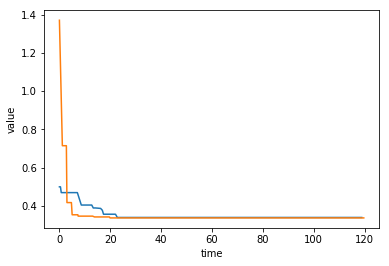

In [8]:
sns.lineplot(x=df_stan.time, y=df_stan.value.cummin());
sns.lineplot(x=df_prun.time, y=df_prun.value.cummin());

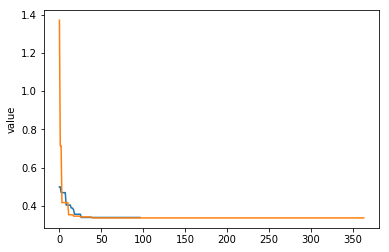

In [9]:
sns.lineplot(x=df_stan.index, y=df_stan.value.cummin());
sns.lineplot(x=df_prun.index, y=df_prun.value.cummin());

In [10]:
df_prun.shape[0] / df_stan.shape[0]

3.752577319587629